<a href="https://colab.research.google.com/github/Manan1811/Time-Series-Forecasting-/blob/master/Time_Series_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Epoch 1/400
 - 0s - loss: 32747.1707
Epoch 2/400
 - 0s - loss: 8546.2249
Epoch 3/400
 - 0s - loss: 1615.2498
Epoch 4/400
 - 0s - loss: 941.4264
Epoch 5/400
 - 0s - loss: 908.1200
Epoch 6/400
 - 0s - loss: 894.8638
Epoch 7/400
 - 0s - loss: 874.4971
Epoch 8/400
 - 0s - loss: 854.1228
Epoch 9/400
 - 0s - loss: 865.0633
Epoch 10/400
 - 0s - loss: 825.1989
Epoch 11/400
 - 0s - loss: 822.2630
Epoch 12/400
 - 0s - loss: 837.2011
Epoch 13/400
 - 0s - loss: 807.5246
Epoch 14/400
 - 0s - loss: 786.4769
Epoch 15/400
 - 0s - loss: 793.0502
Epoch 16/400
 - 0s - loss: 816.7946
Epoch 17/400
 - 0s - loss: 778.5007
Epoch 18/400
 - 0s - loss: 769.5991
Epoch 19/400
 - 0s - loss: 745.4809
Epoch 20/400
 - 0s - loss: 750.1692
Epoch 21/400
 - 0s - loss: 753.8518
Epoch 22/400
 - 0s - loss: 782.6153
Epoch 23/400
 - 0s - loss: 707.6452
Epoch 24/400
 - 0s - loss: 694.1006
Epoch 25/400
 - 0s - loss: 703.9353
Epoch 26/400
 - 0s - loss: 672.9115
Epoch 27/400
 - 0s - loss: 670.6481
Epoch 28/400
 - 0s - loss: 667.84

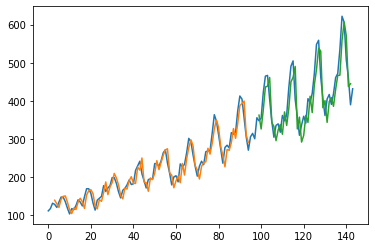

In [3]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# load the dataset
dataframe = read_csv( "/content/drive/My Drive/airline-passengers.csv", usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()